### Practicle 10
### Statistical Foundation of Data Sciences
### Divyanshi Bhandari
### GF202344105
### Submitted To- Anitya Sir

In [11]:

# 1. Imports and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')
df = pd.concat([X, y], axis=1)

print("Dataset loaded.")
print(df.head())



Dataset loaded.
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  targ

In [13]:
# 2. Display Basic Statistics
print(X.describe().T)

                              count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.7825   
od280/od315_of_diluted_wines

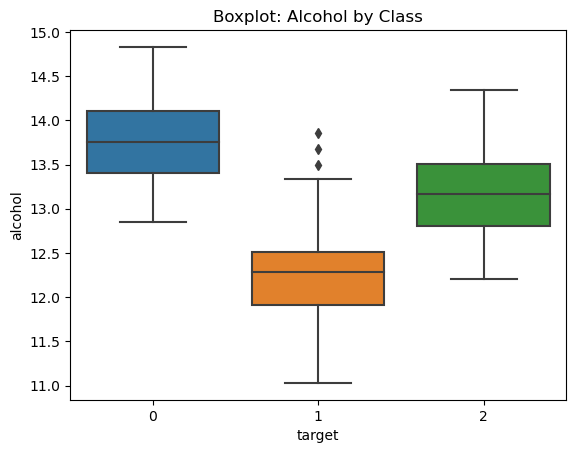

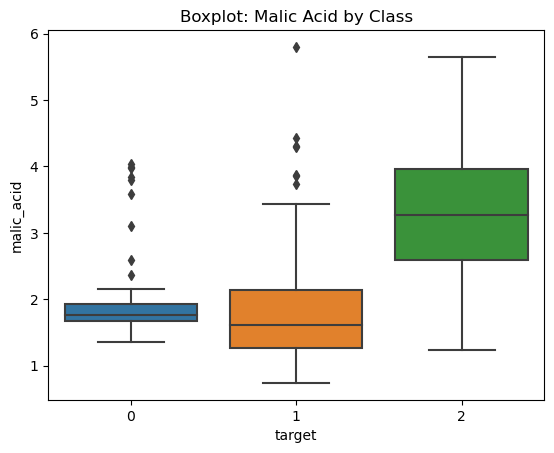

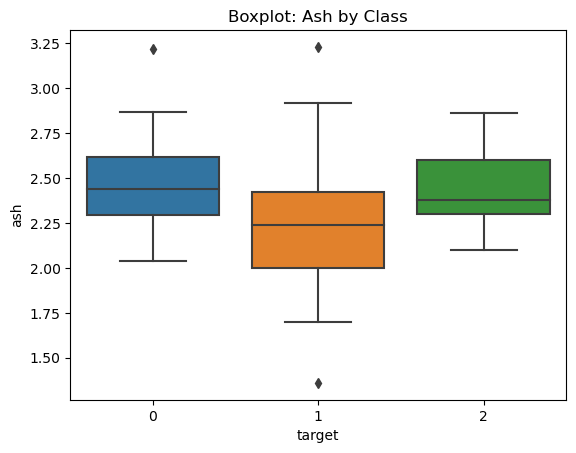

In [15]:
# Boxplot for Alcohol
sns.boxplot(x='target', y='alcohol', data=df)
plt.title('Boxplot: Alcohol by Class')
plt.show()
# Boxplot for Malic Acid
sns.boxplot(x='target', y='malic_acid', data=df)
plt.title('Boxplot: Malic Acid by Class')
plt.show()
# Boxplot for Ash
sns.boxplot(x='target', y='ash', data=df)
plt.title('Boxplot: Ash by Class')
plt.show()

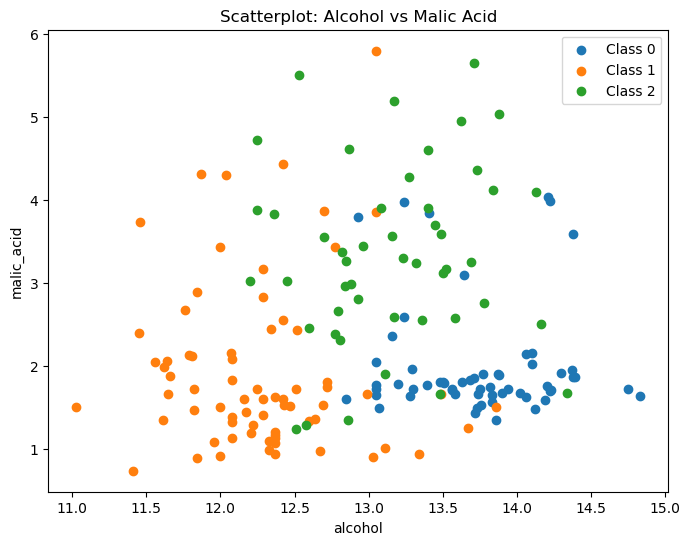

In [31]:
x_var = 'alcohol'
y_var = 'malic_acid'

plt.figure(figsize=(8, 6))

for cls in df.target.unique():
    sub = df[df.target == cls]   
    plt.scatter(sub[x_var], sub[y_var], label=f"Class {cls}")

plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot: Alcohol vs Malic Acid')
plt.legend()
plt.show()

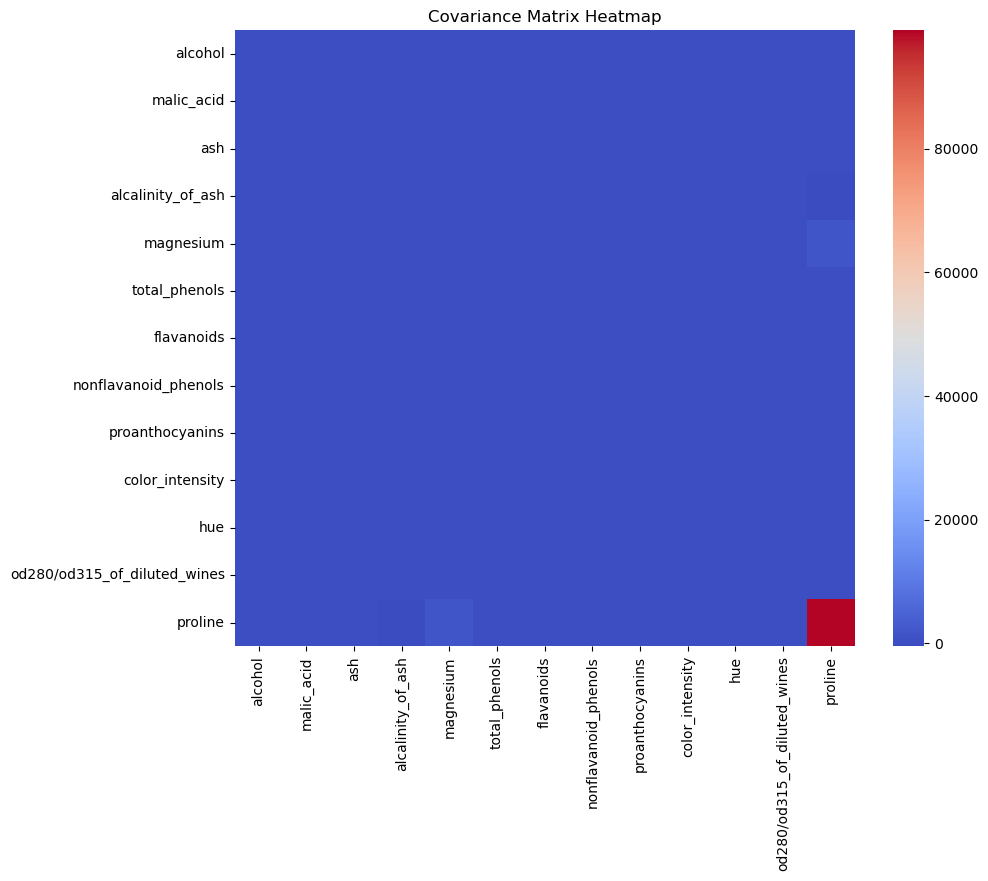

In [25]:
cov_matrix = X.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, cmap='coolwarm')
plt.title('Covariance Matrix Heatmap')
plt.show()

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

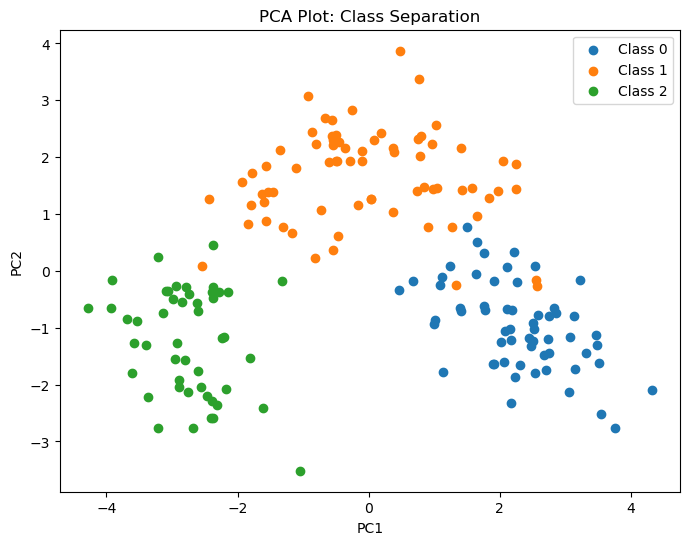

In [35]:
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_comp, columns=['PC1', 'PC2'])
pca_df['target'] = y

plt.figure(figsize=(8, 6))

for cls in pca_df.target.unique():
    sub = pca_df[pca_df.target == cls]    
    plt.scatter(sub['PC1'], sub['PC2'], label=f"Class {cls}")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot: Class Separation')
plt.legend()
plt.show()
